# Importing Required Modules

In [2]:
from zipfile import ZipFile 
import pandas as pd
import os
import numpy as np
import seaborn as sns
# from pandas_profiling import ProfileReport

# A. Securities Outstanding and Ownership Data

# A.1. Extract data file from zip files and combine the data

## a. Create a function for data extraction

In [2]:
def security_data_consolidator(path_folder):

    '''
    security_data_consolidator function extracts all zip files containing txt data downloaded from KSEI website 
    that were saved on a predefined folder, and concatenate all the txt files inside the zip files.
    
    Parameters
    ----------
    path_folder: the path or folder containing zip files

    Returns
    -------
    None
    '''

    # Listing all zip files in the directory
    securities_mf_path = path_folder
    securities_mf_files = os.listdir(securities_mf_path)

    # Create an empty text file
    securities_mf_all_filename = securities_mf_path+'.txt'
    with open(os.path.join(securities_mf_path, securities_mf_all_filename), 'a', encoding="utf-8") as securities_mf_file:
        pass

    # Create temprary folder
    mf_temp_dir = 'tmp'
    if not os.path.exists(os.path.join(securities_mf_path, mf_temp_dir)):
        os.makedirs(os.path.join(securities_mf_path, mf_temp_dir))

    # Track the file processed
    file_processed = 0

    # Iterate over all files in dataset folder. 
    # Extract the txt file and put it in the tmp folder
    # Open the txt file, append its content to the empty file previously created
    # Delete the file in tmp folder
    for file in securities_mf_files:
        # Load the zip file and create a zip object 
        with ZipFile(os.path.join(securities_mf_path, file), 'r') as mf_zip: 
    
            # Extracting all the members of the zip  
            # into a specific location. 
            mf_zip.extractall(path=os.path.join(securities_mf_path, mf_temp_dir)) 
        
        # Close zip file
        mf_zip.close()

        # Open the file in tmp folder, read the content, and delete the file once its done
        securities_mf_tmp = os.listdir(os.path.join(securities_mf_path, mf_temp_dir))
        securities_mf_txt = open(os.path.join(os.path.join(securities_mf_path, mf_temp_dir),securities_mf_tmp[0]),"r", encoding="utf-8")
        file_content = securities_mf_txt.read()
        securities_mf_txt.close()
        os.remove(os.path.join(os.path.join(securities_mf_path, mf_temp_dir),securities_mf_tmp[0]))
        
        # Only the header line on the first file needs to be added to the new file
        if file_processed==0:
            all_mf_file = open(os.path.join(securities_mf_path, securities_mf_all_filename), 'a', encoding="utf-8")
            all_mf_file.write(file_content)
            all_mf_file.close()
        else:
            file_content_list = file_content.split('\n')[1:]
            all_mf_file = open(os.path.join(securities_mf_path, securities_mf_all_filename), 'a', encoding="utf-8")
            all_mf_file.write("\n".join(file_content_list))
            all_mf_file.close()
        
        # Increase file counter
        file_processed+=1

    # Delete tmp folder
    os.removedirs(os.path.join(securities_mf_path, mf_temp_dir))
    print(f'Success! File output: {os.path.join(securities_mf_path, securities_mf_all_filename)}')

## b. Extract data from securities master file 

In [3]:
security_data_consolidator('Dataset_Masterfile_Efek')

Success! File output: Dataset_Masterfile_Efek\Dataset_Masterfile_Efek.txt


## c. Extract data from securities ownership master file

In [4]:
security_data_consolidator('Dataset_Ownership_Efek')

Success! File output: Dataset_Ownership_Efek\Dataset_Ownership_Efek.txt


# 2. Read the combined data

## a. Read security master file data

In [4]:
securities_mf = pd.read_csv('Dataset_Masterfile_Efek/Dataset_Masterfile_Efek.txt', sep='|')
securities_mf.head()

,Date,Code,Description,Type,Isin Code,Issuer,Status,Stock Exchange,Listing Date,Currency,...,Nominal Value,Num. of Sec,Originated Amt,Current Amt,Total Scripless,Local (%),Foreign (%),Total (%),Sector,Closing Price
0,31-MAY-2021,TRIM,TRIMEGAH SEKURITAS INDONESIA Tbk,EQUITY,ID1000052608,"TRIMEGAH SEKURITAS INDONESIA Tbk, PT",ACTIVE,IDX,NaN,IDR,...,50.0,7.109300e+09,NaN,NaN,7.109300e+09,21.17,78.83,100.00,SECURITIES COMPANY,130.0
1,31-MAY-2021,TRIN,PERINTIS TRINITI PROPERTI Tbk,EQUITY,ID1000153604,"PERINTIS TRINITI PROPERTI Tbk, PT",ACTIVE,IDX,15-JAN-2020,IDR,...,100.0,4.373364e+09,NaN,NaN,3.973864e+09,90.87,0.00,90.87,PROPERTY AND REAL ESTATE,157.0
2,31-MAY-2021,TRIO,TRIKOMSEL OKE Tbk,EQUITY,ID1000112501,PT TRIKOMSEL OKE TBK,ACTIVE,IDX,14-APR-2009,IDR,...,100.0,2.600749e+10,NaN,NaN,2.592890e+10,50.62,49.08,99.70,RETAIL TRADE,426.0
3,31-MAY-2021,TRIS,TRISULA INTERNATIONAL Tbk,EQUITY,ID1000123102,"TRISULA INTERNATIONAL Tbk, PT",ACTIVE,IDX,28-JUN-2012,IDR,...,100.0,3.141444e+09,NaN,NaN,3.646108e+08,7.62,3.99,11.61,"TEXTILE, GARMENT",144.0
4,31-MAY-2021,TRJA,TRANSKON JAYA Tbk,EQUITY,ID1000156805,"TRANSKON JAYA Tbk, PT",ACTIVE,IDX,27-AUG-2020,IDR,...,100.0,1.510200e+09,NaN,NaN,3.750000e+08,24.79,0.04,24.83,TRANSPORTATION,168.0


## b. Filter to only display bond instruments

Identify the type of financial securities in the master file. 

In [6]:
securities_mf['Type'].unique()

array(['EQUITY', 'CORPORATE BOND', 'GOVERNMENT BOND', 'WARRANT', 'RIGHT',
       'TERM NOTES', 'NEGOTIABLE CERTIFICATE OF DEPOSIT',
       'COMMERCIAL PAPER', 'SBSN', 'SPN', 'SUKUK', 'EBA',
       'DANA INVESTASI REAL ESTATE', 'EQUITY CROWDFUNDING (ECF)',
       'DEBT CROWD FUNDING', 'SUKUK CROWD FUNDING', 'STRUCTURED WARRANT',
       'BANK INDONESIA RUPIAH SECURITIES (SRBI)',
       'Bank Indonesia Foreign Currency Securities (SVBI)',
       'Bank Indonesia Foreign Currency Sukuk (SUVBI)', 'PERPETUAL BONDS'],
      dtype=object)

In [5]:
bonds_type = ['CORPORATE BOND', 'GOVERNMENT BOND', 
              'SBSN', 'SPN', 'SUKUK', 
              'DEBT CROWD FUNDING', 'SUKUK CROWD FUNDING',
              'BANK INDONESIA RUPIAH SECURITIES (SRBI)',
              'Bank Indonesia Foreign Currency Securities (SVBI)',
              'Bank Indonesia Foreign Currency Sukuk (SUVBI)', 'PERPETUAL BONDS']

Filter the master file to only display bonds data

In [6]:
securities_mf_bond = securities_mf[securities_mf['Type'].isin(bonds_type)].reset_index(drop=True)
securities_mf_bond.head()

,Date,Code,Description,Type,Isin Code,Issuer,Status,Stock Exchange,Listing Date,Currency,...,Nominal Value,Num. of Sec,Originated Amt,Current Amt,Total Scripless,Local (%),Foreign (%),Total (%),Sector,Closing Price
0,31-MAY-2021,ABSM01A,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097A7,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,NaN,NaN,1.150000e+11,1.150000e+11,1.150000e+11,100.0,0.0,100.0,FINANCIAL INSTITUTION,1.0
1,31-MAY-2021,ABSM01B,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097B5,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,NaN,NaN,2.500000e+10,2.500000e+10,2.500000e+10,100.0,0.0,100.0,FINANCIAL INSTITUTION,1.0
2,31-MAY-2021,ABSM01C,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097C3,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,NaN,NaN,3.500000e+10,3.500000e+10,3.500000e+10,100.0,0.0,100.0,FINANCIAL INSTITUTION,1.0
3,31-MAY-2021,ADCP01A,OBLIGASI I ADHI COMMUTER PROPERTI TAHUN 2021 S...,CORPORATE BOND,IDA0001151A2,"ADHI COMMUTER PROPERTI, PT",ACTIVE,IDX,21-MAY-2021,IDR,...,NaN,NaN,4.910000e+11,4.910000e+11,4.910000e+11,100.0,0.0,100.0,PROPERTY AND REAL ESTATE,1.0
4,31-MAY-2021,ADCP01B,OBLIGASI I ADHI COMMUTER PROPERTI TAHUN 2021 S...,CORPORATE BOND,IDA0001151B0,"ADHI COMMUTER PROPERTI, PT",ACTIVE,IDX,21-MAY-2021,IDR,...,NaN,NaN,9.000000e+09,9.000000e+09,9.000000e+09,100.0,0.0,100.0,PROPERTY AND REAL ESTATE,1.0


In [11]:
securities_mf_bond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             43405 non-null  object 
 1   Code             43405 non-null  object 
 2   Description      43405 non-null  object 
 3   Type             43405 non-null  object 
 4   Isin Code        43405 non-null  object 
 5   Issuer           43405 non-null  object 
 6   Status           43405 non-null  object 
 7   Stock Exchange   39433 non-null  object 
 8   Listing Date     39397 non-null  object 
 9   Currency         43405 non-null  object 
 10  Form             43405 non-null  object 
 11  Eff. Date Isin   50 non-null     object 
 12  Maturity Date    43405 non-null  object 
 13  Expire Date      0 non-null      object 
 14  Exercise Price   0 non-null      float64
 15  Interest         38526 non-null  float64
 16  Interest Type    43242 non-null  object 
 17  Interest Fre

## c. Read Security Ownership Data

In [7]:
securities_os = pd.read_csv('Dataset_Ownership_Efek/Dataset_Ownership_Efek.txt', sep='|')
securities_os.head()

,Date,Code,Type,Sec. Num,Price,Local IS,Local CP,Local PF,Local IB,Local ID,...,Foreign IS,Foreign CP,Foreign PF,Foreign IB,Foreign ID,Foreign MF,Foreign SC,Foreign FD,Foreign OT,Total.1
0,31-MAY-2021,AALI,EQUITY,1.924688e+09,8825,114938014.0,1.127444e+07,19468622,49700,100544313,...,1403910,3855240,7316838,13323164,1423464,32725069,26900419,208822,6914300,94071226
1,31-MAY-2021,ABBA,EQUITY,2.755125e+09,246,0.0,1.692657e+09,0,0,566614547,...,0,2120900,0,14969700,1800,0,1900,0,0,17094300
2,31-MAY-2021,ABDA,EQUITY,6.208067e+08,7050,21885.0,4.753868e+07,0,98,47919272,...,0,426136555,0,97403500,400,0,0,0,62,523540517
3,31-MAY-2021,ABMM,EQUITY,2.753165e+09,825,2677000.0,6.965900e+06,1600,0,50690300,...,0,57405300,0,320433900,406600,10351700,0,0,151862900,540460400
4,31-MAY-2021,ACES,EQUITY,1.715000e+10,1495,328564522.0,9.927710e+07,20041945,0,272974411,...,21176900,715615629,1246731977,511051505,1561100,2235817184,196662025,4720799,941505231,5874842350


## d. Filter instrument ownership for bond data only

Filter ownership data to only display bond data

In [8]:
securities_os_bond = securities_os[securities_os['Type'].isin(bonds_type)].reset_index(drop=True)
securities_os_bond.head()

,Date,Code,Type,Sec. Num,Price,Local IS,Local CP,Local PF,Local IB,Local ID,...,Foreign IS,Foreign CP,Foreign PF,Foreign IB,Foreign ID,Foreign MF,Foreign SC,Foreign FD,Foreign OT,Total.1
0,31-MAY-2021,ABSM01A,CORPORATE BOND,1.150000e+11,1,7.500000e+08,5.000000e+08,0,0,15650000000,...,0,0,0,0,0,0,0,0,0,0
1,31-MAY-2021,ABSM01B,CORPORATE BOND,2.500000e+10,1,1.000000e+09,0.000000e+00,0,0,4000000000,...,0,0,0,0,0,0,0,0,0,0
2,31-MAY-2021,ABSM01C,CORPORATE BOND,3.500000e+10,1,0.000000e+00,0.000000e+00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31-MAY-2021,ADCP01A,CORPORATE BOND,4.910000e+11,1,0.000000e+00,1.000000e+11,10000000000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31-MAY-2021,ADCP01B,CORPORATE BOND,9.000000e+09,1,5.000000e+09,0.000000e+00,2000000000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
securities_os_bond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40198 entries, 0 to 40197
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        40198 non-null  object 
 1   Code        40198 non-null  object 
 2   Type        40198 non-null  object 
 3   Sec. Num    38501 non-null  float64
 4   Price       40198 non-null  int64  
 5   Local IS    40198 non-null  float64
 6   Local CP    40198 non-null  float64
 7   Local PF    40198 non-null  int64  
 8   Local IB    40198 non-null  int64  
 9   Local ID    40198 non-null  int64  
 10  Local MF    40198 non-null  int64  
 11  Local SC    40198 non-null  int64  
 12  Local FD    40198 non-null  int64  
 13  Local OT    40198 non-null  int64  
 14  Total       40198 non-null  float64
 15  Foreign IS  40198 non-null  int64  
 16  Foreign CP  40198 non-null  int64  
 17  Foreign PF  40198 non-null  int64  
 18  Foreign IB  40198 non-null  int64  
 19  Foreign ID  40198 non-nul

# 3. Merge ownership and master data

## a. Merge Data

Both dataframe are outer-joined using Date and Code columns.

In [9]:
bond_data = securities_mf_bond.merge(securities_os_bond, on=['Date','Code'], how='outer')
bond_data.head()

,Date,Code,Description,Type_x,Isin Code,Issuer,Status,Stock Exchange,Listing Date,Currency,...,Foreign IS,Foreign CP,Foreign PF,Foreign IB,Foreign ID,Foreign MF,Foreign SC,Foreign FD,Foreign OT,Total.1
0,31-MAY-2021,ABSM01A,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097A7,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31-MAY-2021,ABSM01B,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097B5,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31-MAY-2021,ABSM01C,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097C3,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31-MAY-2021,ADCP01A,OBLIGASI I ADHI COMMUTER PROPERTI TAHUN 2021 S...,CORPORATE BOND,IDA0001151A2,"ADHI COMMUTER PROPERTI, PT",ACTIVE,IDX,21-MAY-2021,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31-MAY-2021,ADCP01B,OBLIGASI I ADHI COMMUTER PROPERTI TAHUN 2021 S...,CORPORATE BOND,IDA0001151B0,"ADHI COMMUTER PROPERTI, PT",ACTIVE,IDX,21-MAY-2021,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## b. Rename total ownership columns 

Rename column Total and Total.1 which are initially duplicate columns from ownership data. Column 'Total' represents the total of instrument ownership by Indonesian citizen, while column 'Total.1' represents the total of instrument ownership by non-Indonesian citizen.

In [10]:
bond_data.rename(columns={'Total': 'Total_Local_Ownership', 'Total.1': 'Total_Foreign_Ownership'}, inplace=True)

## c. Add total outstanding column

In [11]:
bond_data['Total_Outstanding'] = bond_data['Total_Local_Ownership']+bond_data['Total_Foreign_Ownership']
pd.options.display.float_format = '{:.0f}'.format
bond_data.head()

,Date,Code,Description,Type_x,Isin Code,Issuer,Status,Stock Exchange,Listing Date,Currency,...,Foreign CP,Foreign PF,Foreign IB,Foreign ID,Foreign MF,Foreign SC,Foreign FD,Foreign OT,Total_Foreign_Ownership,Total_Outstanding
0,31-MAY-2021,ABSM01A,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097A7,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,0,0,0,0,0,0,0,0,0,115000000000
1,31-MAY-2021,ABSM01B,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097B5,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,0,0,0,0,0,0,0,0,0,25000000000
2,31-MAY-2021,ABSM01C,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097C3,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,0,0,0,0,0,0,0,0,0,35000000000
3,31-MAY-2021,ADCP01A,OBLIGASI I ADHI COMMUTER PROPERTI TAHUN 2021 S...,CORPORATE BOND,IDA0001151A2,"ADHI COMMUTER PROPERTI, PT",ACTIVE,IDX,21-MAY-2021,IDR,...,0,0,0,0,0,0,0,0,0,491000000000
4,31-MAY-2021,ADCP01B,OBLIGASI I ADHI COMMUTER PROPERTI TAHUN 2021 S...,CORPORATE BOND,IDA0001151B0,"ADHI COMMUTER PROPERTI, PT",ACTIVE,IDX,21-MAY-2021,IDR,...,0,0,0,0,0,0,0,0,0,9000000000


In [18]:
bond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44246 entries, 0 to 44245
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     44246 non-null  object 
 1   Code                     44246 non-null  object 
 2   Description              43405 non-null  object 
 3   Type_x                   43405 non-null  object 
 4   Isin Code                43405 non-null  object 
 5   Issuer                   43405 non-null  object 
 6   Status                   43405 non-null  object 
 7   Stock Exchange           39433 non-null  object 
 8   Listing Date             39397 non-null  object 
 9   Currency                 43405 non-null  object 
 10  Form                     43405 non-null  object 
 11  Eff. Date Isin           50 non-null     object 
 12  Maturity Date            43405 non-null  object 
 13  Expire Date              0 non-null      object 
 14  Exercise Price        

In [55]:
bond_data[bond_data['Code'].str.contains('PBSG')].head()

,Date,Code,Description,Type_x,Isin Code,Issuer,Status,Stock Exchange,Listing Date,Currency,...,Foreign IS,Foreign CP,Foreign PF,Foreign IB,Foreign ID,Foreign MF,Foreign SC,Foreign FD,Foreign OT,Total.1
18177,30-SEP-2022,PBSG001,SBSN Seri PBSG001,SBSN,IDP000005308,PEMERINTAH REPUBLIK INDONESIA,ACTIVE,IDX,23-SEP-2022,IDR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19154,31-OCT-2022,PBSG001,SBSN Seri PBSG001,SBSN,IDP000005308,PEMERINTAH REPUBLIK INDONESIA,ACTIVE,IDX,23-SEP-2022,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20341,30-NOV-2022,PBSG001,SBSN Seri PBSG001,SBSN,IDP000005308,PEMERINTAH REPUBLIK INDONESIA,ACTIVE,IDX,23-SEP-2022,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21530,30-DEC-2022,PBSG001,SBSN Seri PBSG001,SBSN,IDP000005308,PEMERINTAH REPUBLIK INDONESIA,ACTIVE,IDX,23-SEP-2022,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22856,31-JAN-2023,PBSG001,SBSN Seri PBSG001,SBSN,IDP000005308,PEMERINTAH REPUBLIK INDONESIA,ACTIVE,IDX,23-SEP-2022,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Export Bond Dataset for Future Use

In [12]:
bond_data.to_csv('Indonesia_All_Bonds_Data.txt', sep='#',index=False)

In [3]:
bond_data = pd.read_csv('Indonesia_All_Bonds_Data.txt', sep='#')
bond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44246 entries, 0 to 44245
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     44246 non-null  object 
 1   Code                     44246 non-null  object 
 2   Description              43405 non-null  object 
 3   Type_x                   43405 non-null  object 
 4   Isin Code                43405 non-null  object 
 5   Issuer                   43405 non-null  object 
 6   Status                   43405 non-null  object 
 7   Stock Exchange           39433 non-null  object 
 8   Listing Date             39397 non-null  object 
 9   Currency                 43405 non-null  object 
 10  Form                     43405 non-null  object 
 11  Eff. Date Isin           50 non-null     object 
 12  Maturity Date            43405 non-null  object 
 13  Expire Date              0 non-null      float64
 14  Exercise Price        

# 4. Filter GSS Bonds

In [9]:
green_sukuk = ['ST006','ST007','ST008','ST009','ST010T4','ST011T2','ST011T4','ST012T4','PBSG001']

In [16]:
gss_bond_data = bond_data[(bond_data['Description'].str.contains('BKLJ') | bond_data['Description'].str.contains('BERKELANJUTAN') |   # First keyword: sustainable or berkelanjutan
                          bond_data['Description'].str.contains('GREEN ') |    # Second keyword: green (with whitespace after)
                          bond_data['Description'].str.contains('LINGKUNGAN') |   # Third keyword: environment or lingkungan
                          bond_data['Code'].isin(green_sukuk) | (bond_data['Code'].str.contains('SWR') & bond_data['Type_y'].str.contains('SBSN'))) &   # sovereign sukuk is not listed in master data, therefore it has to be identified manually
                          bond_data['Foreign OT'].notnull()   # Ownership data is not null, representing that the bond has been traded in public
                          ].reset_index(drop=True)
gss_bond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29441 entries, 0 to 29440
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     29441 non-null  object 
 1   Code                     29441 non-null  object 
 2   Description              29283 non-null  object 
 3   Type_x                   29283 non-null  object 
 4   Isin Code                29283 non-null  object 
 5   Issuer                   29283 non-null  object 
 6   Status                   29283 non-null  object 
 7   Stock Exchange           29171 non-null  object 
 8   Listing Date             29171 non-null  object 
 9   Currency                 29283 non-null  object 
 10  Form                     29283 non-null  object 
 11  Eff. Date Isin           0 non-null      object 
 12  Maturity Date            29283 non-null  object 
 13  Expire Date              0 non-null      float64
 14  Exercise Price        

# 5. Add label columns for identification of GSS Bonds Data

## a. Create criteria function for labelling GSS Bonds Type

In [17]:
def gss_bond_type_labeller(row):
    
    '''
    gss_bond_type_labeller function labels each row in gss bonds dataframe based on the predefined criteria.
    
    Parameters
    ----------
    row: the row of a dataframe

    Returns
    -------
    row_label
    '''
    if isinstance(row['Description'],str):
        if ('SBSN' in row['Type_y'] and ('ST0' in row['Code']  or 'PBSG' in row['Code'])) or 'GREEN ' in row['Description'] or 'LINGKUNGAN' in row['Description']:
            row_label = 'Green Bonds'
        elif 'SOSIAL' in row['Description'] or ('SWR' in row['Code'] and 'SBSN' in row['Type_y']):
            row_label = 'Social Bonds'
        else:
            row_label = 'Sustainability Bonds'
    else:
        if ('SBSN' in row['Type_y'] and ('ST0' in row['Code']  or 'PBSG' in row['Code'])):
            row_label = 'Green Bonds'
        elif ('SWR' in row['Code'] and 'SBSN' in row['Type_y']):
            row_label = 'Social Bonds'
        else:
            row_label = 'Sustainability Bonds'        
    
    return row_label

## b. Create criteria function for labelling GSS Bond issuer type

In [18]:
def gss_bond_issuer_labeller(row):
    
    '''
    gss_bond_issuer_labeller function labels each row in gss bonds dataframe based on the predefined criteria.
    
    Parameters
    ----------
    row: the row of a dataframe

    Returns
    -------
    row_label
    '''

    if 'SBSN' in row['Type_y']:
        row_label = 'Government'
    elif 'PERSERO' in row['Issuer'] or 'BANK PEMBANGUNAN DAERAH' in row['Issuer']:
        row_label = 'State-owned Enterprise'
    else:
        row_label = 'Private Corporation'
    return row_label

## c. Apply row labelling

In [90]:
gss_bond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29441 entries, 0 to 29440
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     29441 non-null  object 
 1   Code                     29441 non-null  object 
 2   Description              29283 non-null  object 
 3   Type_x                   29283 non-null  object 
 4   Isin Code                29283 non-null  object 
 5   Issuer                   29283 non-null  object 
 6   Status                   29283 non-null  object 
 7   Stock Exchange           29171 non-null  object 
 8   Listing Date             29171 non-null  object 
 9   Currency                 29283 non-null  object 
 10  Form                     29283 non-null  object 
 11  Eff. Date Isin           0 non-null      object 
 12  Maturity Date            29283 non-null  object 
 13  Expire Date              0 non-null      object 
 14  Exercise Price        

In [19]:
gss_bond_data['GSS_Bond_Type'] = gss_bond_data.apply(gss_bond_type_labeller, axis=1)
gss_bond_data['GSS_Bond_Issuer_Type'] = gss_bond_data.apply(gss_bond_issuer_labeller, axis=1)
gss_bond_data.head()

,Date,Code,Description,Type_x,Isin Code,Issuer,Status,Stock Exchange,Listing Date,Currency,...,Foreign IB,Foreign ID,Foreign MF,Foreign SC,Foreign FD,Foreign OT,Total_Foreign_Ownership,Total_Outstanding,GSS_Bond_Type,GSS_Bond_Issuer_Type
0,31-MAY-2021,ADHI02ACN2,OBLIGASI BERKELANJUTAN II ADHI KARYA TAHAP II ...,CORPORATE BOND,IDA0000984A7,"ADHI KARYA (PERSERO) Tbk, PT",ACTIVE,IDX,26-JUN-2019,IDR,...,0,0,0,0,0,0,0,556000000000,Sustainability Bonds,State-owned Enterprise
1,31-MAY-2021,ADHI02BCN2,OBLIGASI BERKELANJUTAN II ADHI KARYA TAHAP II ...,CORPORATE BOND,IDA0000984B5,"ADHI KARYA (PERSERO) Tbk, PT",ACTIVE,IDX,26-JUN-2019,IDR,...,0,0,0,0,0,0,0,473500000000,Sustainability Bonds,State-owned Enterprise
2,31-MAY-2021,ADHI02CN1,OBL BERKELANJUTAN II ADHI KARYA TAHAP I TAHUN ...,CORPORATE BOND,IDA000082002,"ADHI KARYA (PERSERO) Tbk, PT",ACTIVE,IDX,03-JUL-2017,IDR,...,0,0,0,0,0,0,0,2997000000000,Sustainability Bonds,State-owned Enterprise
3,31-MAY-2021,ADHI03CN1,OBLIGASI BERKELANJUTAN III ADHI KARYA TAHAP I ...,CORPORATE BOND,IDA000111900,"ADHI KARYA (PERSERO) Tbk, PT",ACTIVE,IDX,19-NOV-2020,IDR,...,0,0,0,0,0,0,0,289600000000,Sustainability Bonds,State-owned Enterprise
4,31-MAY-2021,ADMF03CCN4,OBL BKLJT III ADIRA FINANCE TAHAP IV TH 2016 SR C,CORPORATE BOND,IDA0000749C0,"ADIRA DINAMIKA MULTI FINANCE Tbk, PT",ACTIVE,IDX,27-JUL-2016,IDR,...,0,0,0,0,0,0,0,431000000000,Sustainability Bonds,Private Corporation


In [58]:
gss_bond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29369 entries, 0 to 29368
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     29369 non-null  object 
 1   Code                     29369 non-null  object 
 2   Description              29283 non-null  object 
 3   Type_x                   29283 non-null  object 
 4   Isin Code                29283 non-null  object 
 5   Issuer                   29283 non-null  object 
 6   Status                   29283 non-null  object 
 7   Stock Exchange           29171 non-null  object 
 8   Listing Date             29171 non-null  object 
 9   Currency                 29283 non-null  object 
 10  Form                     29283 non-null  object 
 11  Eff. Date Isin           0 non-null      object 
 12  Maturity Date            29283 non-null  object 
 13  Expire Date              0 non-null      object 
 14  Exercise Price        

# 6. Structure and Export GSS Bonds data

In [20]:
gss_bond_data.to_csv('Indonesia_GSS_Bonds_Data.txt', sep='#',index=False)

In [24]:
gss_bond_data[gss_bond_data['Code']=='ST011T2']

,Date,Code,Description,Type_x,Isin Code,Issuer,Status,Stock Exchange,Listing Date,Currency,...,Foreign IB,Foreign ID,Foreign MF,Foreign SC,Foreign FD,Foreign OT,Total_Foreign_Ownership,Total_Outstanding,GSS_Bond_Type,GSS_Bond_Issuer_Type
29413,29-DEC-2023,ST011T2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,7932185000000,Green Bonds,Government
29419,31-JAN-2024,ST011T2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,7932185000000,Green Bonds,Government
29425,29-FEB-2024,ST011T2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,7932185000000,Green Bonds,Government
29431,28-MAR-2024,ST011T2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,7932185000000,Green Bonds,Government
29437,30-APR-2024,ST011T2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,7932185000000,Green Bonds,Government


In [122]:
gss_bond_data[gss_bond_data['Issuer'].str.contains('CV')]

,Date,Code,Description,Type_x,Isin Code,Issuer,Status,Stock Exchange,Listing Date,Currency,...,Foreign IB,Foreign ID,Foreign MF,Foreign SC,Foreign FD,Foreign OT,Total_Foreign_Ownership,Total_Outstanding,GSS_Bond_Type,GSS_Bond_Issuer_Type
23233,29-SEP-2023,JCAF01X1SCFS,SUKUK MUDHARABAH BERKELANJUTAN CV JAWA CLASSIC...,SUKUK CROWD FUNDING,IDZ000017302,CV JAWA CLASSIC AESTETICS FURNITURE & CRAFT,ACTIVE,NaN,NaN,IDR,...,0,0,0,0,0,0,0,466500000,Sustainability Bonds,Private Corporation
23601,31-OCT-2023,JCAF01X1SCFS,SUKUK MUDHARABAH BERKELANJUTAN CV JAWA CLASSIC...,SUKUK CROWD FUNDING,IDZ000017302,CV JAWA CLASSIC AESTETICS FURNITURE & CRAFT,ACTIVE,NaN,NaN,IDR,...,0,0,0,0,0,0,0,466500000,Sustainability Bonds,Private Corporation
24164,30-NOV-2023,AGLG01X1SCFS,SUKUK MUDHARABAH BERKELANJUTAN CV AMANAH GEMIL...,SUKUK CROWD FUNDING,IDZ000018805,CV AMANAH GEMILANG LOGISTIK,ACTIVE,NaN,NaN,IDR,...,0,0,0,0,0,0,0,274900000,Sustainability Bonds,Private Corporation
24170,30-NOV-2023,JCAF01X1SCFS,SUKUK MUDHARABAH BERKELANJUTAN CV JAWA CLASSIC...,SUKUK CROWD FUNDING,IDZ000017302,CV JAWA CLASSIC AESTETICS FURNITURE & CRAFT,ACTIVE,NaN,NaN,IDR,...,0,0,0,0,0,0,0,466500000,Sustainability Bonds,Private Corporation
24171,30-NOV-2023,JCAF01X2SCFS,SUKUK MUDHARABAH BERKELANJUTAN CV JAWA CLASSIC...,SUKUK CROWD FUNDING,IDZ000018904,CV JAWA CLASSIC AESTETICS FURNITURE & CRAFT,ACTIVE,NaN,NaN,IDR,...,0,0,0,0,0,0,0,339500000,Sustainability Bonds,Private Corporation
25357,29-DEC-2023,AGLG01X1SCFS,SUKUK MUDHARABAH BERKELANJUTAN CV AMANAH GEMIL...,SUKUK CROWD FUNDING,IDZ000018805,CV AMANAH GEMILANG LOGISTIK,ACTIVE,NaN,NaN,IDR,...,0,0,0,0,0,0,0,274900000,Sustainability Bonds,Private Corporation
25358,29-DEC-2023,AGLG01X2SCFS,SUKUK MUDHARABAH BERKELANJUTAN CV AMANAH GEMIL...,SUKUK CROWD FUNDING,IDZ000019407,CV AMANAH GEMILANG LOGISTIK,ACTIVE,NaN,NaN,IDR,...,0,0,0,0,0,0,0,274900000,Sustainability Bonds,Private Corporation
25359,29-DEC-2023,AGLG01X3SCFS,SUKUK MUSYARAKAH BERKELANJUTAN CV AMANAH GEMIL...,SUKUK CROWD FUNDING,IDZ000021502,CV AMANAH GEMILANG LOGISTIK,ACTIVE,NaN,NaN,IDR,...,0,0,0,0,0,0,0,506100000,Sustainability Bonds,Private Corporation
25367,29-DEC-2023,JCAF01X1SCFS,SUKUK MUDHARABAH BERKELANJUTAN CV JAWA CLASSIC...,SUKUK CROWD FUNDING,IDZ000017302,CV JAWA CLASSIC AESTETICS FURNITURE & CRAFT,ACTIVE,NaN,NaN,IDR,...,0,0,0,0,0,0,0,466500000,Sustainability Bonds,Private Corporation
25368,29-DEC-2023,JCAF01X2SCFS,SUKUK MUDHARABAH BERKELANJUTAN CV JAWA CLASSIC...,SUKUK CROWD FUNDING,IDZ000018904,CV JAWA CLASSIC AESTETICS FURNITURE & CRAFT,ACTIVE,NaN,NaN,IDR,...,0,0,0,0,0,0,0,339500000,Sustainability Bonds,Private Corporation


In [2]:
gss_bond_data = pd.read_csv('Indonesia_GSS_Bonds_Data.txt', sep='#')
gss_bond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29441 entries, 0 to 29440
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     29441 non-null  object 
 1   Code                     29441 non-null  object 
 2   Description              29283 non-null  object 
 3   Type_x                   29283 non-null  object 
 4   Isin Code                29283 non-null  object 
 5   Issuer                   29283 non-null  object 
 6   Status                   29283 non-null  object 
 7   Stock Exchange           29171 non-null  object 
 8   Listing Date             29171 non-null  object 
 9   Currency                 29283 non-null  object 
 10  Form                     29283 non-null  object 
 11  Eff. Date Isin           0 non-null      float64
 12  Maturity Date            29283 non-null  object 
 13  Expire Date              0 non-null      float64
 14  Exercise Price        

## Identify Null Values in important columns

In [45]:
# null values in Sector column
gss_bond_data[gss_bond_data['Sector'].isnull()]['Code'].unique()

array(['SMMF01BCN4', 'SMMF01CCN1', 'SMMF02ACN1', 'SMMF02ACN2',
       'SMMF02BCN1', 'SMMF02BCN2', 'SMMF02CCN2', 'SMMF01BCN1',
       'SMMF01BCN2', 'SMMF01BCN3', 'SMMF02ACN3', 'SMMF02BCN3',
       'SMMF02CCN3', 'PBSG001', 'SMMF03ACN1', 'SMMF03BCN1', 'SMMF03CCN1',
       'SMMF03ACN2', 'SMMF03BCN2', 'ST006', 'ST007', 'SWR001', 'SWR002',
       'ST008', 'SWR003', 'ST009', 'ST010T4', 'SWR004', 'ST011T2',
       'ST011T4'], dtype=object)

In [43]:
# null values in Description column
gss_bond_data[gss_bond_data['Description'].isnull()]['Code'].unique()

array(['ST006', 'ST007', 'SWR001', 'SWR002', 'ST008', 'SWR003', 'ST009',
       'ST010T4', 'SWR004', 'ST011T2', 'ST011T4'], dtype=object)

In [42]:
# null values in Interest column
gss_bond_data[gss_bond_data['Interest'].isnull()]['Code'].unique()

array(['SMADMF03BCN3', 'SMADMF03BCN4', 'SMADMF03CCN3', 'SMADMF03CCN4',
       'SMADMF04CN1', 'SMBAFI01ACN2', 'SMBAFI01BCN2', 'SMBAFI01CN1',
       'SMBEXI01BCN2', 'SMBEXI01BCN3', 'SMBEXI01CCN2', 'SMBEXI01CCN3',
       'SMBEXI01DCN2', 'SMBEXI02CN1', 'SMBNGA01BCN1', 'SMBNGA01BCN2',
       'SMBNGA01BCN3', 'SMBNGA01CCN2', 'SMBNGA01CCN3', 'SMPPGD01ACN2',
       'SMPPGD01ACN3', 'SMPPGD01ACN4', 'SMPPGD01BCN1', 'SMPPGD01BCN2',
       'SMPPGD01BCN3', 'SMPPGD01BCN4', 'SMPPGD01CCN2', 'SMSMFP01CN2',
       'SMSMFP01CN3', 'SMSMII01BCN2', 'SMSMII01BCN3', 'SMSMII01CCN3',
       'SMSMII01DCN3', 'SMWIKA01ACN1', 'SMWIKA01ACN2', 'SMWIKA01BCN1',
       'SMWIKA01BCN2', 'SMWIKA01CCN1', 'SMWIKA01CCN2', 'SMWOOD01ACN1',
       'SMWOOD01BCN1', 'SMADMF04ACN2', 'SMADMF04BCN2', 'SMMFIN01CN1',
       'SMPNMP01ACN1', 'SMPNMP01BCN1', 'SMPNMP01CCN1', 'SMPTPP01ACN1',
       'SMPTPP01BCN1', 'SMSMFP02CN1', 'SMINKP01ACN1', 'SMINKP01BCN1',
       'SMINKP01CCN1', 'SMPTHK01ACN1', 'SMPTHK01BCN1', 'SMPTHK01CCN1',
       'SMWIK

In [38]:
# null values in Isin Code column
gss_bond_data[gss_bond_data['Isin Code'].isnull()]['Code'].unique()

array(['ST006', 'ST007', 'SWR001', 'SWR002', 'ST008', 'SWR003', 'ST009',
       'ST010T4', 'SWR004', 'ST011T2', 'ST011T4'], dtype=object)

In [41]:
# null values in Issuer column
gss_bond_data[gss_bond_data['Issuer'].isnull()]['Code'].unique()

array(['ST006', 'ST007', 'SWR001', 'SWR002', 'ST008', 'SWR003', 'ST009',
       'ST010T4', 'SWR004', 'ST011T2', 'ST011T4'], dtype=object)

## Fill the NaN from certain columns in dataset

Some important columns that have NaN values are:
* Description, because some sovereign sukuk are not listed in Master Data. The NaN values will be filled using the from Code column, because it contains the same identification of its series.
* Interest, some rows have NaN because they are sukuk. It is then filled with 0 if NaN is identified.
* Issuer, since some sovereign sukuk are not listed in Master Data. The NaN values will be filled using 'PEMERINTAH REPUBLIK INDONESIA'
* Isin Code, securities with no identified Isin Code will be filled its NaN column with 'Not Identified'
* Sector, securities with code SMMF is issued by Sinar Mas Multi Finansial therefore 'FINANCIAL INSTITUTION' sector can be applied, for the rest they are government sukuk therefore 'GOVERNMENT' sector can be applied

In [3]:
# Filling the NaN of Description column with code column
gss_bond_data['Description'] = gss_bond_data['Description'].fillna(gss_bond_data['Code'])
# Filling the NaN of Isin Code column with 'Not Identified'
gss_bond_data['Isin Code'] = gss_bond_data['Isin Code'].fillna('Not Identified')
# Filling the NaN of Interest column with 0
gss_bond_data['Interest'] = gss_bond_data['Interest'].fillna(0)
# Filling the NaN of Issuer column with 'PEMERINTAH REPUBLIK INDONESIA'
gss_bond_data['Issuer'] = gss_bond_data['Issuer'].fillna('PEMERINTAH REPUBLIK INDONESIA')
# Filling the NaN of Sector column 
def sector_fill(row):
    if not isinstance(row['Sector'],str):
        if 'SMMF' in row['Code']:
            fill_value = 'FINANCIAL INSTITUTION'
        else:
            fill_value = 'GOVERNMENT'
    else:
        fill_value = row['Sector']
    return fill_value
gss_bond_data['Sector'] = gss_bond_data.apply(sector_fill,axis=1)
gss_bond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29441 entries, 0 to 29440
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     29441 non-null  object 
 1   Code                     29441 non-null  object 
 2   Description              29441 non-null  object 
 3   Type_x                   29283 non-null  object 
 4   Isin Code                29441 non-null  object 
 5   Issuer                   29441 non-null  object 
 6   Status                   29283 non-null  object 
 7   Stock Exchange           29171 non-null  object 
 8   Listing Date             29171 non-null  object 
 9   Currency                 29283 non-null  object 
 10  Form                     29283 non-null  object 
 11  Eff. Date Isin           0 non-null      float64
 12  Maturity Date            29283 non-null  object 
 13  Expire Date              0 non-null      float64
 14  Exercise Price        

In [109]:
gss_data_columns = list(gss_bond_data.columns)
print(gss_data_columns)

['Date', 'Code', 'Description', 'Type_x', 'Isin Code', 'Issuer', 'Status', 'Stock Exchange', 'Listing Date', 'Currency', 'Form', 'Eff. Date Isin', 'Maturity Date', 'Expire Date', 'Exercise Price', 'Interest', 'Interest Type', 'Interest Freq', 'Nominal Value', 'Num. of Sec', 'Originated Amt', 'Current Amt', 'Total Scripless', 'Local (%)', 'Foreign (%)', 'Total (%)', 'Sector', 'Closing Price', 'Type_y', 'Sec. Num', 'Price', 'Local IS', 'Local CP', 'Local PF', 'Local IB', 'Local ID', 'Local MF', 'Local SC', 'Local FD', 'Local OT', 'Total_Local_Ownership', 'Foreign IS', 'Foreign CP', 'Foreign PF', 'Foreign IB', 'Foreign ID', 'Foreign MF', 'Foreign SC', 'Foreign FD', 'Foreign OT', 'Total_Foreign_Ownership', 'Total_Outstanding', 'GSS_Bond_Type', 'GSS_Bond_Issuer_Type']


## Create GSS Bond General Info Dataset

This dataset contains the general info of GSS Bonds. The columns of this dataset are: 'Code', 'Description','Isin Code', 'Issuer','Sector','Type_y','Total_Outstanding','GSS_Bond_Type', 'GSS_Bond_Issuer_Type'

In [104]:
# general_info_group = ['Code', 'Description','Isin Code', 'Type_y','GSS_Bond_Type']
general_info_columns = ['Code', 'Description','Isin Code','Type_y','GSS_Bond_Type', 
                        'Issuer','Sector', 'GSS_Bond_Issuer_Type']
gss_bond_general_info = gss_bond_data.sort_values(by=['Date', 'Code'], ascending=False).groupby(general_info_columns[:5]).first().reset_index()[general_info_columns]
gss_bond_general_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Code                  1455 non-null   object
 1   Description           1455 non-null   object
 2   Isin Code             1455 non-null   object
 3   Type_y                1455 non-null   object
 4   GSS_Bond_Type         1455 non-null   object
 5   Issuer                1455 non-null   object
 6   Sector                1455 non-null   object
 7   GSS_Bond_Issuer_Type  1455 non-null   object
dtypes: object(8)
memory usage: 91.1+ KB


In [105]:
len(gss_bond_general_info['Code'].unique())

1455

## Export GSS Bonds General Info to text-file

In [106]:
gss_bond_general_info.to_csv('Indonesia_GSS_Bonds_General_Info.txt',sep='#',index=False)

## Create dataset of monthly GSS bonds ownership and outstanding

In [115]:
gss_non_value_column = ['Date','Code','Interest']
gss_bond_monthly_value_column = [col for col in gss_data_columns if '%' not in col and (col in gss_non_value_column or 'Total_' in col or 'Local ' in col or 'Foreign ' in col)]
gss_bond_monthly_value = gss_bond_data[gss_bond_monthly_value_column]
gss_bond_monthly_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29441 entries, 0 to 29440
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     29441 non-null  object 
 1   Code                     29441 non-null  object 
 2   Interest                 29441 non-null  float64
 3   Local IS                 29441 non-null  float64
 4   Local CP                 29441 non-null  float64
 5   Local PF                 29441 non-null  float64
 6   Local IB                 29441 non-null  float64
 7   Local ID                 29441 non-null  float64
 8   Local MF                 29441 non-null  float64
 9   Local SC                 29441 non-null  float64
 10  Local FD                 29441 non-null  float64
 11  Local OT                 29441 non-null  float64
 12  Total_Local_Ownership    29441 non-null  float64
 13  Foreign IS               29441 non-null  float64
 14  Foreign CP            

In [116]:
gss_bond_monthly_value.to_csv('Indonesia_GSS_Bonds_Monthly_Value.txt',sep='#',index=False)

In [4]:
gss_bond_monthly_value = pd.read_csv('Indonesia_GSS_Bonds_Monthly_Value.txt',sep='#')
gss_bond_general_info = pd.read_csv('Indonesia_GSS_Bonds_General_Info.txt',sep='#')
gss_bond_data = pd.merge(left=gss_bond_general_info,right=gss_bond_monthly_value,on=['Code'],how='inner')
gss_bond_data['Date'] = pd.to_datetime(gss_bond_data['Date']).dt.date
gss_bond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29441 entries, 0 to 29440
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Code                     29441 non-null  object 
 1   Description              29441 non-null  object 
 2   Isin Code                29441 non-null  object 
 3   Type_y                   29441 non-null  object 
 4   GSS_Bond_Type            29441 non-null  object 
 5   Issuer                   29441 non-null  object 
 6   Sector                   29441 non-null  object 
 7   GSS_Bond_Issuer_Type     29441 non-null  object 
 8   Date                     29441 non-null  object 
 9   Interest                 29441 non-null  float64
 10  Local IS                 29441 non-null  float64
 11  Local CP                 29441 non-null  float64
 12  Local PF                 29441 non-null  float64
 13  Local IB                 29441 non-null  float64
 14  Local ID              

C:\Users\Reza\AppData\Local\Temp\ipykernel_35864\637756348.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gss_bond_data['Date'] = pd.to_datetime(gss_bond_data['Date']).dt.date


<Axes: xlabel='Date', ylabel='Instrument_Type'>

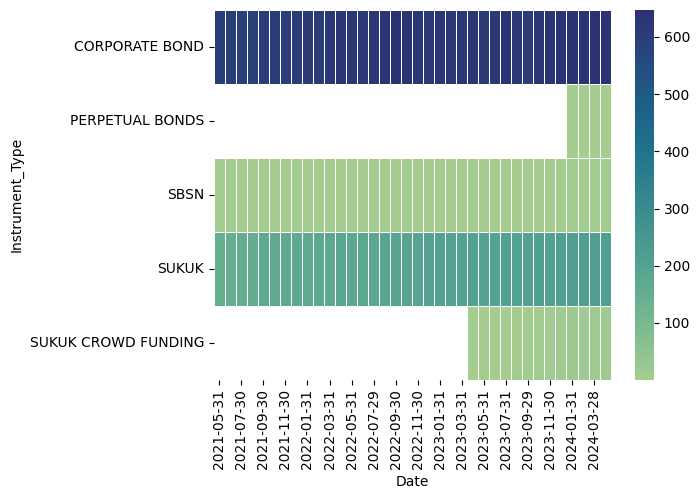

In [34]:
pd.options.display.float_format = '{:.0f}'.format
gss_bond_data_pivot_1 = pd.pivot_table(gss_bond_data.rename(columns={'Type_y':'Instrument_Type'}), index='Instrument_Type',columns='Date', values='Code',aggfunc='count')
gss_bond_data_pivot_1
sns.heatmap(gss_bond_data_pivot_1, cmap='crest',fmt='.0f',linewidth=.5)

<Axes: xlabel='GSS_Bond_Type', ylabel='Date'>

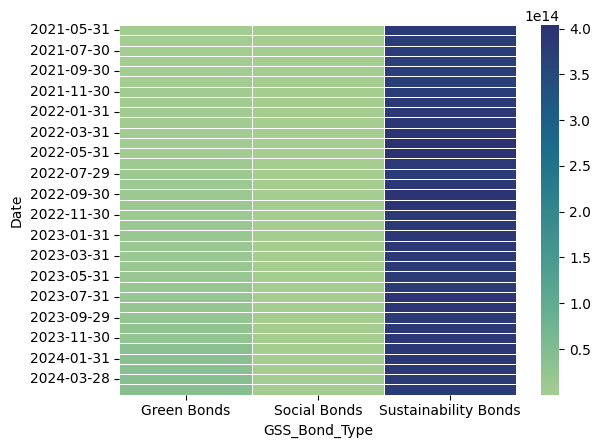

In [30]:
gss_bond_data_pivot_2 = pd.pivot_table(gss_bond_data, index='Date',columns='GSS_Bond_Type', values='Total_Outstanding',aggfunc='sum')
gss_bond_data_pivot_2
sns.heatmap(gss_bond_data_pivot_2, cmap='crest',fmt='.0f',linewidth=.5)

In [39]:
gss_bond_data.columns
gss_bond_data_local = gss_bond_data[['Type_y', 'GSS_Bond_Type','Sector', 'GSS_Bond_Issuer_Type', 
                                      'Local IS','Local CP', 'Local PF', 'Local IB', 'Local ID', 
                                      'Local MF', 'Local SC','Local FD', 'Local OT']]
gss_bond_data_local = gss_bond_data_local.melt(id_vars=['Type_y', 'GSS_Bond_Type','Sector', 'GSS_Bond_Issuer_Type'],
                                               value_vars=['Local IS','Local CP', 'Local PF', 'Local IB', 'Local ID', 
                                      'Local MF', 'Local SC','Local FD', 'Local OT'])
gss_bond_data_foreign = gss_bond_data[['Type_y', 'GSS_Bond_Type','Sector', 'GSS_Bond_Issuer_Type', 
                                      'Foreign IS','Foreign CP', 'Foreign PF', 'Foreign IB', 'Foreign ID', 
                                      'Foreign MF','Foreign SC', 'Foreign FD', 'Foreign OT']]
gss_bond_data_foreign = gss_bond_data_foreign.melt(id_vars=['Type_y', 'GSS_Bond_Type','Sector', 'GSS_Bond_Issuer_Type'],
                                               value_vars=['Foreign IS','Foreign CP', 'Foreign PF', 'Foreign IB', 'Foreign ID', 
                                      'Foreign MF','Foreign SC', 'Foreign FD', 'Foreign OT'])

<Axes: title={'center': 'value'}, xlabel='variable'>

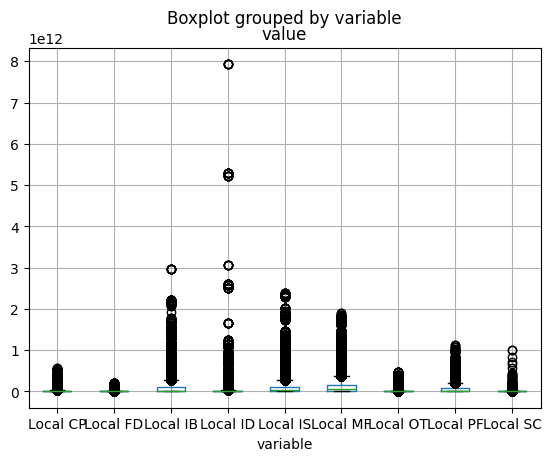

In [41]:
gss_bond_data_local.boxplot(by='variable', column=['value'])

<Axes: >

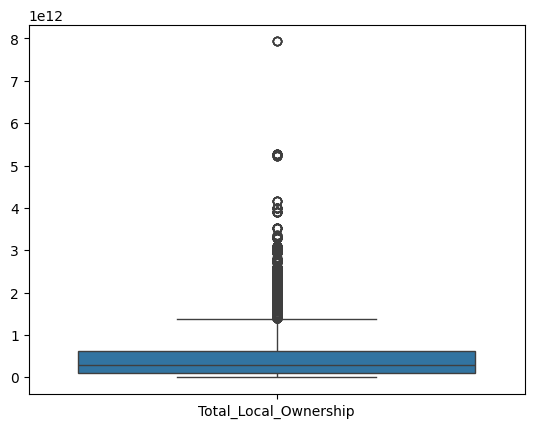

In [37]:
sns.boxplot(data=gss_bond_data[['Total_Local_Ownership']])

# 7. Create dataset for GSS Bonds comparison with total bonds instrument in the market

In [5]:
bond_data_recap = bond_data[bond_data['Foreign OT'].notnull()]

In [107]:
bond_data_recap.head()

,Date,Code,Description,Type_x,Isin Code,Issuer,Status,Stock Exchange,Listing Date,Currency,...,Foreign CP,Foreign PF,Foreign IB,Foreign ID,Foreign MF,Foreign SC,Foreign FD,Foreign OT,Total_Foreign_Ownership,Total_Outstanding
0,31-MAY-2021,ABSM01A,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097A7,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,0,0,0,0,0,0,0,0,0,115000000000
1,31-MAY-2021,ABSM01B,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097B5,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,0,0,0,0,0,0,0,0,0,25000000000
2,31-MAY-2021,ABSM01C,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097C3,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,0,0,0,0,0,0,0,0,0,35000000000
3,31-MAY-2021,ADCP01A,OBLIGASI I ADHI COMMUTER PROPERTI TAHUN 2021 S...,CORPORATE BOND,IDA0001151A2,"ADHI COMMUTER PROPERTI, PT",ACTIVE,IDX,21-MAY-2021,IDR,...,0,0,0,0,0,0,0,0,0,491000000000
4,31-MAY-2021,ADCP01B,OBLIGASI I ADHI COMMUTER PROPERTI TAHUN 2021 S...,CORPORATE BOND,IDA0001151B0,"ADHI COMMUTER PROPERTI, PT",ACTIVE,IDX,21-MAY-2021,IDR,...,0,0,0,0,0,0,0,0,0,9000000000


Labelling each row to differentiate between GSS Bonds and the rest

In [6]:
def bond_gss_labeller(row):
    
    '''
    bond_gss_labeller function labels each row in gss bonds dataframe based on the predefined criteria.
    
    Parameters
    ----------
    row: the row of a dataframe

    Returns
    -------
    row_label
    '''
    if isinstance(row['Description'],str):
        if  row['Code'] in green_sukuk or 'BERKELANJUTAN' in row['Description'] or 'BKLJ' in row['Description'] or 'GREEN ' in row['Description'] or 'LINGKUNGAN' in row['Description'] or 'SOSIAL' in row['Description'] or ('SWR' in row['Code'] and 'SBSN' in row['Type_y']):
            row_label = 'GSS Bonds'
        else:
            row_label = 'Non GSS Bonds'
    else:
        if row['Code'] in green_sukuk or ('SWR' in row['Code'] and 'SBSN' in row['Type_y']):
            row_label = 'GSS Bonds'
        else:
            row_label = 'Non GSS Bonds'

    return row_label

In [10]:
bond_data_recap['GSS'] = bond_data_recap.apply(bond_gss_labeller, axis=1)
bond_data_recap.head()

C:\Users\Reza\AppData\Local\Temp\ipykernel_35864\1960343577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bond_data_recap['GSS'] = bond_data_recap.apply(bond_gss_labeller, axis=1)


,Date,Code,Description,Type_x,Isin Code,Issuer,Status,Stock Exchange,Listing Date,Currency,...,Foreign PF,Foreign IB,Foreign ID,Foreign MF,Foreign SC,Foreign FD,Foreign OT,Total_Foreign_Ownership,Total_Outstanding,GSS
0,31-MAY-2021,ABSM01A,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097A7,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.150000e+11,Non GSS Bonds
1,31-MAY-2021,ABSM01B,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097B5,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.500000e+10,Non GSS Bonds
2,31-MAY-2021,ABSM01C,OBLIGASI AB SINAR MAS MULTIFINANCE I TAHUN 202...,CORPORATE BOND,IDA0001097C3,"AB SINAR MAS MULTIFINANCE, PT",ACTIVE,IDX,07-SEP-2020,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.500000e+10,Non GSS Bonds
3,31-MAY-2021,ADCP01A,OBLIGASI I ADHI COMMUTER PROPERTI TAHUN 2021 S...,CORPORATE BOND,IDA0001151A2,"ADHI COMMUTER PROPERTI, PT",ACTIVE,IDX,21-MAY-2021,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.910000e+11,Non GSS Bonds
4,31-MAY-2021,ADCP01B,OBLIGASI I ADHI COMMUTER PROPERTI TAHUN 2021 S...,CORPORATE BOND,IDA0001151B0,"ADHI COMMUTER PROPERTI, PT",ACTIVE,IDX,21-MAY-2021,IDR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000e+09,Non GSS Bonds


In [11]:
bond_data_summarized = bond_data_recap.groupby(by=['Date','Type_y','GSS']).sum(['Total_Outstanding']).reset_index()[['Date','Type_y','GSS','Total_Outstanding']]
bond_data_summarized.head()

,Date,Type_y,GSS,Total_Outstanding
0,25-FEB-2022,CORPORATE BOND,GSS Bonds,3.576754e+14
1,25-FEB-2022,CORPORATE BOND,Non GSS Bonds,4.578821e+13
2,25-FEB-2022,DEBT CROWD FUNDING,Non GSS Bonds,1.071000e+09
3,25-FEB-2022,GOVERNMENT BOND,Non GSS Bonds,7.942343e+13
4,25-FEB-2022,SBSN,GSS Bonds,5.213575e+12


In [12]:
bond_data_summarized.to_csv('Indonesia_GSS_Bonds_Portion_Data_Summary_2.txt', sep='#',index=False)

In [13]:
bond_data_summarized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               343 non-null    object 
 1   Type_y             343 non-null    object 
 2   GSS                343 non-null    object 
 3   Total_Outstanding  343 non-null    float64
dtypes: float64(1), object(3)
memory usage: 10.8+ KB


# Indonesia Green Bonds Allocation

In [21]:
green_sukuk_allocation = pd.read_excel('Green_Bond_Impact.xlsx')
#green_sukuk_allocation = green_sukuk_allocation[green_sukuk_allocation['Instrument'].str.contains('Retail')]
green_sukuk_allocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ProjectID                                          118 non-null    int64  
 1   Instrument                                         118 non-null    object 
 2   IssuedYear                                         118 non-null    int64  
 3   ProjectYear                                        118 non-null    int64  
 4   No.                                                118 non-null    int64  
 5   Sector                                             118 non-null    object 
 6   Type of Project*a                                  118 non-null    object 
 7   Project Name                                       118 non-null    object 
 8   Brief Description                                  118 non-null    object 
 9   Location*b

In [22]:
green_sukuk_allocation['Location_List'] = green_sukuk_allocation['Location*b'].str.split(', ')
green_sukuk_allocation['Location_List']

0      [Aceh, North Sumatra, West Sumatra, South Suma...
1                    [Special Capital Region of Jakarta]
2      [Bangka Belitung Islands, Special Capital Regi...
3                                       [South Sulawesi]
4      [Special Capital Region of Jakarta (Greater Ja...
                             ...                        
113                      [All provinces exclude Jakarta]
114                [Kediri City and Jogjakarta Province]
115                                            [Jakarta]
116          [All provinces, excluding North Kalimantan]
117                  [Bandung Regency and Bogor Regency]
Name: Location_List, Length: 118, dtype: object

In [20]:
green_sukuk_allocation.columns

Index(['ProjectID', 'Instrument', 'IssuedYear', 'ProjectYear', 'No.', 'Sector',
       'Type of Project*a', 'Project Name', 'Brief Description', 'Location*b',
       'Amount Committed (in IDR)*c', 'Amount Committed (in USD)*c',
       'Average Project Lifetime*d',
       'Mitigation (Annual GHG Emission Avoided, in CO₂e)', 'Other results *f',
       'Social / SDGs*g', 'Project Owners', 'Location_List'],
      dtype='object')

In [ ]:
green_sukuk_allocation.to_csv('all_green_sukuk_allocation.txt')

In [23]:
green_sukuk_allocation_location = green_sukuk_allocation[['ProjectID','Location_List']]
green_sukuk_allocation_location.head()

,ProjectID,Location_List
0,1,"[Aceh, North Sumatra, West Sumatra, South Suma..."
1,2,[Special Capital Region of Jakarta]
2,3,"[Bangka Belitung Islands, Special Capital Regi..."
3,4,[South Sulawesi]
4,5,[Special Capital Region of Jakarta (Greater Ja...


In [25]:
green_sukuk_allocation_location = green_sukuk_allocation_location.explode('Location_List')
green_sukuk_allocation_location

,ProjectID,Location_List
0,1,Aceh
0,1,North Sumatra
0,1,West Sumatra
0,1,South Sumatra
0,1,Riau
...,...,...
114,115,Kediri City and Jogjakarta Province
115,116,Jakarta
116,117,All provinces
116,117,excluding North Kalimantan


In [27]:
green_sukuk_allocation_location.to_csv('all_green_sukuk_allocation_location.txt',sep='#',index=False)

# Data Preparation for Green Pipeline

In [50]:
green_pipeline_type_1 = pd.read_excel('green-pipeline-data-prep.xlsx', sheet_name=1,dtype=str)
green_pipeline_type_1.head(123)

,Sector,Project name,Location,Cost (USD),Status,Greenness,Pipeline source,Notes,group
0,Low carbon transport,LRT Gading-Jakarta,Jakarta,USD462,Planned,Green,Jakarta City,Market,1
1,Low carbon transport,International Stadium,NaN,(IDR6.6tn)171,NaN,NaN,Government,sounding172,1
2,Low carbon transport,(JIS),NaN,NaN,NaN,NaN,NaN,NaN,1
3,Low carbon transport,MRT Phase 3 Kalideres-,Jakarta,USD3.8bn,Planned,Green,RPJMN,Seeking,2
4,Low carbon transport,Ujung Menteng (East,NaN,(IDR55tn),NaN,NaN,2020 â€“ 2024,USD106m,2
5,Low carbon transport,â€“ West Line),NaN,NaN,NaN,NaN,NaN,loan173,2
6,Low carbon transport,MRT Phase 4,South Jakarta,USD1.96bn,Planned,Green,Jakarta City,Seeking,3
7,Low carbon transport,Fatmawati-TMII,NaN,(IDR28tn)174,NaN,NaN,Government,for private,3
8,Low carbon transport,NaN,NaN,NaN,NaN,NaN,NaN,investors,3
9,Low carbon transport,MRT Jakarta (North â€“,Jakarta,USD2.76bn,Completed,Green,Jakarta City,NaN,4


In [54]:
green_pipeline_type_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sector           45 non-null     object
 1   Project name     33 non-null     object
 2   Location         29 non-null     object
 3   Cost (USD)       29 non-null     object
 4   Status           21 non-null     object
 5   Greenness        23 non-null     object
 6   Pipeline source  24 non-null     object
 7   Notes            10 non-null     object
 8   group            45 non-null     object
dtypes: object(9)
memory usage: 3.3+ KB


In [55]:
green_pipeline_type_1_columns = list(green_pipeline_type_1.columns)[1:-1]
green_pipeline_type_1_columns

['Project name',
 'Location',
 'Cost (USD)',
 'Status',
 'Greenness',
 'Pipeline source',
 'Notes']

In [69]:
green_pipeline_type_1_grouped =green_pipeline_type_1.groupby(['Sector','group'], as_index=False).sum().reset_index()
green_pipeline_type_1_grouped['Location'] = green_pipeline_type_1_grouped['Location'].str.replace('â€“',',')
green_pipeline_type_1_grouped['Location'] = green_pipeline_type_1_grouped['Location'].str.replace(' ,',',')
green_pipeline_type_1_grouped['Location'] = green_pipeline_type_1_grouped['Location'].str.replace(', ',',')
green_pipeline_type_1_grouped['Project name'] = green_pipeline_type_1_grouped['Project name'].str.replace('â€“',',')
green_pipeline_type_1_grouped.head(290)

,index,Sector,group,Project name,Location,Cost (USD),Status,Greenness,Pipeline source,Notes
0,0,Low carbon transport,1,LRT Gading-JakartaInternational Stadium(JIS),Jakarta,USD462(IDR6.6tn)171,Planned,Green,Jakarta CityGovernment,Marketsounding172
1,1,Low carbon transport,10,"Rantau Prapat , Duri ,Pekanbaru Railway","Jambi,Sumatra",USD721m(IDR10.3tn),Underconstruction,Green,NationalStrategicProjects/ KPPIP,0
2,2,Low carbon transport,11,Kulon Progo AirportAccess Railway,Yogyakarta,USD84m(IDR1.2tn),Completed,Green,NationalStrategicProjects/ KPPIP,0
3,3,Low carbon transport,2,"MRT Phase 3 Kalideres-Ujung Menteng (East, Wes...",Jakarta,USD3.8bn(IDR55tn),Planned,Green,RPJMN2020 â€“ 2024,SeekingUSD106mloan173
4,4,Low carbon transport,3,MRT Phase 4Fatmawati-TMII,South Jakarta,USD1.96bn(IDR28tn)174,Planned,Green,Jakarta CityGovernment,Seekingfor privateinvestors
5,5,Low carbon transport,4,"MRT Jakarta (North ,South Corridor)",Jakarta,USD2.76bn(IDR39.5tn),Completed,Green,Jakarta CityGovernment,0
6,6,Low carbon transport,5,Transit OrientedDevelopment (TOD)Pegangsaan Dua,Jakarta,USD103m(IDR1.5tn),Planned,Green,Jakarta CityGovernment,Marketsounding
7,7,Low carbon transport,6,"Jakarta , SurabayaRailway","Jakarta,EastJava",USD7.2bn(IDR102.37tn)175,Underconstruction,Green,NationalStrategicProjects/ KPPIP,0
8,8,Low carbon transport,7,LRT Palembang,SouthSumatra,USD755m176,Completed(operational),Green,KPPPIP,0
9,9,Low carbon transport,8,Soekarno HattaInternational AirportExpress Train,"Jakarta,Banten",USD1.7bn(IDR24.5tn),Completed,Green,Priority project/KPPIP,0


In [70]:
green_pipeline_type_1_grouped[1:].to_csv('green_pipeline_type_1.txt',index=False,sep='#')

In [83]:
green_pipeline_type_2 = pd.read_excel('green-pipeline-data-prep.xlsx', sheet_name='tabula-green-pipeline (1)',dtype=str)
green_pipeline_type_2.rename(columns = green_pipeline_type_2.iloc[0])
green_pipeline_type_2.drop(green_pipeline_type_2.index[0])
green_pipeline_type_2.head(10)

,Sector,Sub-sector,Project name,Location,Cost (USD),Status,Greenness,Pipeline source,Notes
0,Low carbon transport,NaN,Medan-Binjai-Deli_x000D_Serdang (Mebidang) LRT,"Medan, North_x000D_Sumatra",USD1.42bn_x000D_(IDR20.3tn)177,Planned,Green,Others,NaN
1,Low carbon transport,NaN,Siantar – Parapat_x000D_Railway,"Medan, North_x000D_Sumatra",USD847m_x000D_(IDR12.1tn)178,Planned,Green,Others,NaN
2,Renewable energy,Hydropower,Pelosika Dam_x000D_Construction Project (2 x_x...,Southeast_x000D_Sulawesi_x000D_Province,USD600m,Planned,Potentially_x000D_green,RPJMN_x000D_2020 – 2024,Seeking_x000D_USD150 loan
3,Renewable energy,Hydropower,Peusangan 1 & 2 (87_x000D_MW),"Aceh Province,_x000D_Sumatra",USD140m,Under_x000D_construction,Potentially_x000D_green,RPJMN_x000D_2020 – 2024,Seeking_x000D_USD131m_x000D_loan
4,Renewable energy,Hydropower,Matenggeng Pumped_x000D_Storage Hydroelectric_...,Central and_x000D_West Java_x000D_Province,USD1.04bn,Under_x000D_construction,Potentially_x000D_green,RPJMN_x000D_2020 – 2024,Seeking_x000D_USD829.9_x000D_loan
5,Renewable energy,Hydropower,Karian Dam,"Tangerang,_x000D_Banten_x000D_Province",USD88m,Under_x000D_construction,Potentially_x000D_green,RPJMN_x000D_2020 – 2024,Seeking_x000D_USD50m_x000D_loan
6,Renewable energy,Hydropower,Riam Kiwa Dam_x000D_Construction Project,South_x000D_Kalimantan_x000D_Province,USD294.12m,Planned,Potentially_x000D_green,RPJMN_x000D_2020 – 2024,Seeking a_x000D_USD250m_x000D_loan
7,Renewable energy,Hydropower,Upper Cisokan Pumped_x000D_Storage Hydroelectr...,"Bandung,_x000D_West Java_x000D_Province",USD910m,Planned,Potentially_x000D_green,RPJMN_x000D_2020 – 2024,Seeking a_x000D_USD650m_x000D_loan
8,Renewable energy,Geothermal,Hululais 1 & 2 (55 MW_x000D_x 2),"Bengkulu_x000D_Province,_x000D_Sumatra",USD246m,Under_x000D_construction,Green,RPJMN_x000D_2020 – 2024,Seeking_x000D_USD204m_x000D_loan
9,Renewable energy,Geothermal,Blawan Ijen_x000D_Geothermal Power_x000D_Plant...,"Ijen, East Java",USD203m,Under_x000D_construction,Green,PT SMI pipeline,NaN


In [85]:
green_pipeline_type_2_columns = list(green_pipeline_type_2.columns)
green_pipeline_type_2_columns
for i in green_pipeline_type_2_columns:
    green_pipeline_type_2[i] = green_pipeline_type_2[i].fillna(' ')
    green_pipeline_type_2[i] = green_pipeline_type_2[i].str.replace('_x000D_',' ')
green_pipeline_type_2.head(25)


,Sector,Sub-sector,Project name,Location,Cost (USD),Status,Greenness,Pipeline source,Notes
0,Low carbon transport,,Medan-Binjai-Deli Serdang (Mebidang) LRT,"Medan, North Sumatra",USD1.42bn (IDR20.3tn)177,Planned,Green,Others,
1,Low carbon transport,,Siantar – Parapat Railway,"Medan, North Sumatra",USD847m (IDR12.1tn)178,Planned,Green,Others,
2,Renewable energy,Hydropower,Pelosika Dam Construction Project (2 x 10.5MW),Southeast Sulawesi Province,USD600m,Planned,Potentially green,RPJMN 2020 – 2024,Seeking USD150 loan
3,Renewable energy,Hydropower,Peusangan 1 & 2 (87 MW),"Aceh Province, Sumatra",USD140m,Under construction,Potentially green,RPJMN 2020 – 2024,Seeking USD131m loan
4,Renewable energy,Hydropower,Matenggeng Pumped Storage Hydroelectric (4 x 225),Central and West Java Province,USD1.04bn,Under construction,Potentially green,RPJMN 2020 – 2024,Seeking USD829.9 loan
5,Renewable energy,Hydropower,Karian Dam,"Tangerang, Banten Province",USD88m,Under construction,Potentially green,RPJMN 2020 – 2024,Seeking USD50m loan
6,Renewable energy,Hydropower,Riam Kiwa Dam Construction Project,South Kalimantan Province,USD294.12m,Planned,Potentially green,RPJMN 2020 – 2024,Seeking a USD250m loan
7,Renewable energy,Hydropower,Upper Cisokan Pumped Storage Hydroelectric Pla...,"Bandung, West Java Province",USD910m,Planned,Potentially green,RPJMN 2020 – 2024,Seeking a USD650m loan
8,Renewable energy,Geothermal,Hululais 1 & 2 (55 MW x 2),"Bengkulu Province, Sumatra",USD246m,Under construction,Green,RPJMN 2020 – 2024,Seeking USD204m loan
9,Renewable energy,Geothermal,Blawan Ijen Geothermal Power Plant (110 MW),"Ijen, East Java",USD203m,Under construction,Green,PT SMI pipeline,


In [86]:
green_pipeline_type_2.to_csv('green_pipeline_type_2.txt',index=False,sep='#')

## Separate pipeline dataset into two dataset: the pipeline green project and location dataset

In [103]:
green_pipeline = pd.read_excel('green-pipeline-data-prep.xlsx',sheet_name='dataset-pipeline')
green_pipeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pipeline_ProjectID  49 non-null     int64  
 1   Sector              49 non-null     object 
 2   Sub-sector          30 non-null     object 
 3   Project name        49 non-null     object 
 4   Location            49 non-null     object 
 5   Cost (USD)          49 non-null     object 
 6   Status              49 non-null     object 
 7   Greenness           49 non-null     object 
 8   Pipeline source     49 non-null     object 
 9   Notes               49 non-null     object 
 10  Cost_USD_Number     49 non-null     float64
 11  Denominator         49 non-null     object 
 12  Province            49 non-null     object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.1+ KB


In [104]:
green_pipeline['Province_list'] = green_pipeline['Province'].str.split(', ')
nominal_representation = {'m':1000000,'bn':1000000000}
green_pipeline['Cost_Required'] = green_pipeline.apply(lambda x: x['Cost_USD_Number']*nominal_representation[x['Denominator']], axis=1)
green_pipeline['Cost_Required_per_Province'] = green_pipeline.apply(lambda x: x['Cost_Required']/len(x['Province_list']), axis=1)
green_pipeline.head()

,Pipeline_ProjectID,Sector,Sub-sector,Project name,Location,Cost (USD),Status,Greenness,Pipeline source,Notes,Cost_USD_Number,Denominator,Province,Province_list,Cost_Required,Cost_Required_per_Province
0,1,Low carbon transport,NaN,"Rantau Prapat , Duri ,Pekanbaru Railway","Jambi,Sumatra",USD721m(IDR10.3tn),Under construction,Green,NationalStrategicProjects/ KPPIP,0,721.00,m,Jambi,[Jambi],7.210000e+08,7.210000e+08
1,2,Low carbon transport,NaN,Kulon Progo AirportAccess Railway,Yogyakarta,USD84m(IDR1.2tn),Completed,Green,NationalStrategicProjects/ KPPIP,0,84.00,m,Yogyakarta,[Yogyakarta],8.400000e+07,8.400000e+07
2,3,Low carbon transport,NaN,"MRT Phase 3 Kalideres-Ujung Menteng (East, Wes...",Jakarta,USD3.8bn(IDR55tn),Planned,Green,RPJMN2020 Ã¢â‚¬â€œ 2024,SeekingUSD106mloan173,3.80,bn,Jakarta,[Jakarta],3.800000e+09,3.800000e+09
3,4,Low carbon transport,NaN,MRT Phase 4Fatmawati-TMII,South Jakarta,USD1.96bn(IDR28tn)174,Planned,Green,Jakarta CityGovernment,Seekingfor privateinvestors,1.96,bn,Jakarta,[Jakarta],1.960000e+09,1.960000e+09
4,5,Low carbon transport,NaN,"MRT Jakarta (North ,South Corridor)",Jakarta,USD2.76bn(IDR39.5tn),Completed,Green,Jakarta CityGovernment,0,2.76,bn,Jakarta,[Jakarta],2.760000e+09,2.760000e+09


In [105]:
green_pipeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pipeline_ProjectID          49 non-null     int64  
 1   Sector                      49 non-null     object 
 2   Sub-sector                  30 non-null     object 
 3   Project name                49 non-null     object 
 4   Location                    49 non-null     object 
 5   Cost (USD)                  49 non-null     object 
 6   Status                      49 non-null     object 
 7   Greenness                   49 non-null     object 
 8   Pipeline source             49 non-null     object 
 9   Notes                       49 non-null     object 
 10  Cost_USD_Number             49 non-null     float64
 11  Denominator                 49 non-null     object 
 12  Province                    49 non-null     object 
 13  Province_list               49 non-nu

In [106]:
list(green_pipeline.columns)

['Pipeline_ProjectID',
 'Sector',
 'Sub-sector',
 'Project name',
 'Location',
 'Cost (USD)',
 'Status',
 'Greenness',
 'Pipeline source',
 'Notes',
 'Cost_USD_Number',
 'Denominator',
 'Province',
 'Province_list',
 'Cost_Required',
 'Cost_Required_per_Province']

In [99]:
green_pipeline_location = green_pipeline[['Pipeline_ProjectID','Province_list']].explode('Province_list')
green_pipeline_location.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 48
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Pipeline_ProjectID  54 non-null     int64 
 1   Province_list       54 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


## Export green pipeline dataset

In [107]:
green_pipeline[['Pipeline_ProjectID',
 'Sector',
 'Sub-sector',
 'Project name',
 'Greenness',
 'Province',
 'Province_list',
 'Cost_Required',
 'Cost_Required_per_Province']].to_csv('green-pipeline.txt', sep='#', index=False)

In [108]:
green_pipeline_location.to_csv('green-pipeline-location.txt', sep='#', index=False)